# Trabalho 3: Ajuste e curvas por otimização com restrição

**Para o conjunto de dados disponível no arquivo "Trabalho3dados.xlsx", utilizar otimização por descida de gradiente para encontrar os parâmetros $a$, $b$ e $c$  da função $z=ax^3+by^2+c$, $a,b,c,x,y \in \mathbb{R}$ que ajustam a curva $z(x, y)$ ao conjunto de dados. Testar diferentes funções custo e diferente metódos de normalização de dados.**

### 1. Avaliação dos dados

Primordialmente convém obter os dados os dados relevantes que descrevem a função de ajuste de curva. Assim, é possível garantir que os dados são adequados e confiáveis para o ajuste do modelo. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# @brief: importa dados do excel
def GetData():
  df = pd.read_excel("Trabalho3dados.xlsx")
  x = df['x']
  y = df['y']
  z = df['z']
  return(np.array([x, y, z]))

def ConfGraph3D(ax, x, y, z, title):
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(title)

# @brief: plota os dados importados 
def PlotData(fig, Data):
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  ax.scatter(Data[0], Data[1], Data[2], c='blue', marker='o')
  ConfGraph3D(ax, 'x', 'y', 'z', "Dados importados")
  return(Data)


**a. Normalizando os dados**

A normalização é um processo utilizado para ajustar os valores de diferente variáveis ou características em uma escala comum. O objetivo aqui, é tornar os dados comparavéis e evitar que a grandeza de algumas variáveis domine ou influencie excessivamente o modelo ou algoritmo.

Aqui, os dados da dimensão $i$ são normalizados para o intervalo desejado $[N_{min}, N_{max}]$

$$X_{norm}^{i} = Nmin+ \frac{(X^{i}-Xmin)(Nmax-Nmin)}{Xmax-Xmin}$$

In [5]:
def NormalizeData(x, y, z, N_min, N_max):
    X_min = min(x)
    X_max = max(x)
    Y_min = min(y)
    Y_max = max(y)
    X_norm = N_min + (x - X_min) * (N_max - N_min) / (X_max - X_min)
    Y_norm = N_min + (y - Y_min) * (N_max - N_min) / (Y_max - Y_min)
    return(np.array([X_norm, Y_norm, z]))

def PlotNormalizedData(fig, Data):
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter(Data[0], Data[1], Data[2], c='green', marker='o')
    ConfGraph3D(ax, 'x', 'y', 'z', "Dados Normalizados")
    return(Data)

**b. Mudando as coordenadas**

A mudança de coordenadas pode evidenciar propriedades de interesse nos dados que não eram perceptíveis no sistema original.

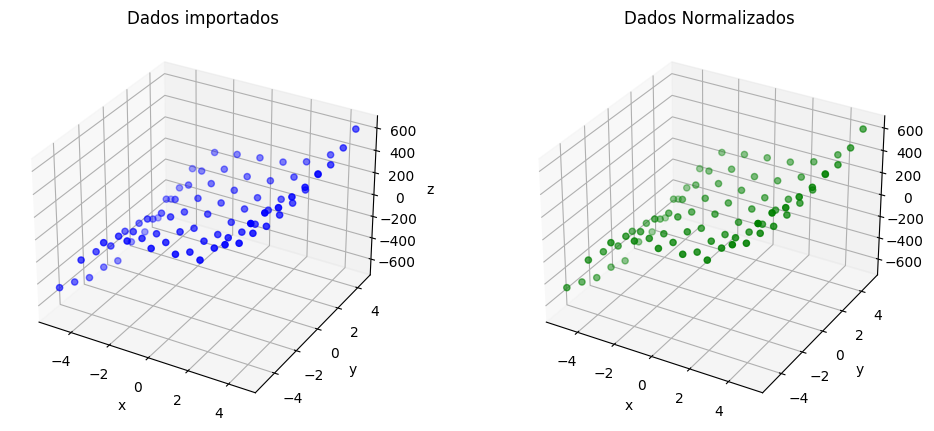

In [8]:


def PlotFigure():
  Data = GetData()
  fig = plt.figure(figsize=(12, 5))
  PlotData(fig, Data)
  PlotNormalizedData(fig, NormalizeData(Data[0], Data[1], Data[2], -5, 5))

PlotFigure()